In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("/kaggle/input/healthcare-insurance/insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [9]:
df.duplicated().sum()

1

In [10]:
df.duplicated().value_counts()

False    1337
True        1
Name: count, dtype: int64

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [15]:
a=df.describe()
a.columns


Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [17]:
a=df.describe(include='object')
a.columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [19]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

*Uivariante*

**Numerical**
*histplot and boxplot*

In [22]:
df["age"].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

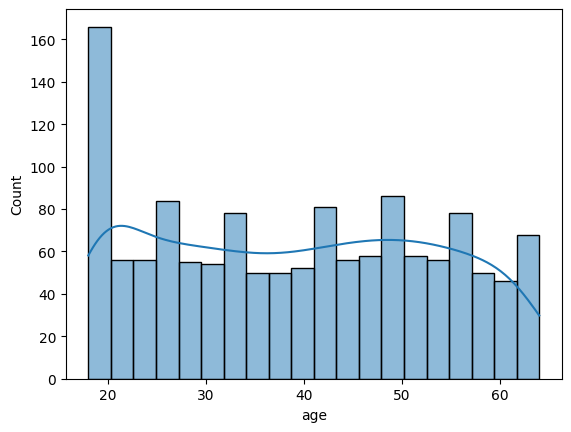

In [21]:
sns.histplot(x="age",data=df,kde=True,bins=20)

In [38]:
df['age'].skew()

0.05567251565299186

<Axes: xlabel='age'>

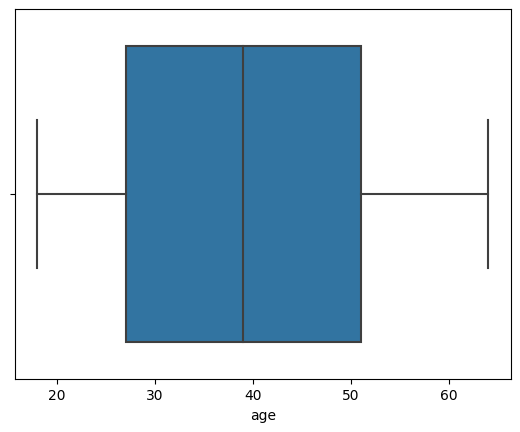

In [23]:
sns.boxplot(x="age",data=df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bmi', ylabel='Count'>

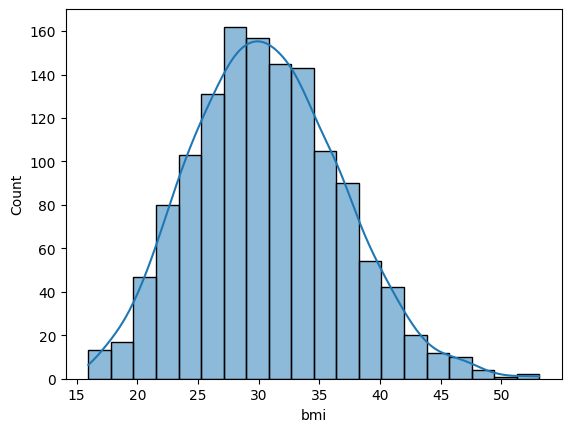

In [24]:
sns.histplot(x="bmi",data=df,kde=True,bins=20)

In [37]:
df['bmi'].skew()

0.2840471105987448

<Axes: xlabel='bmi'>

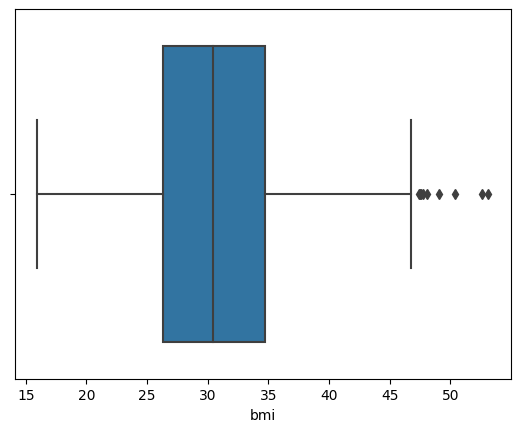

In [25]:
sns.boxplot(x="bmi",data=df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='children', ylabel='Count'>

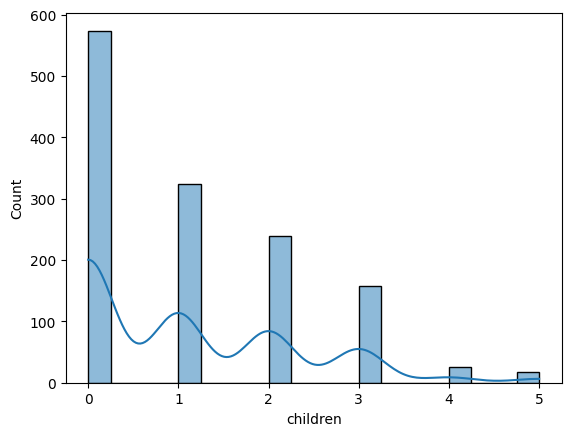

In [29]:
sns.histplot(x='children',data=df,kde=True,bins=20)

In [36]:
df['children'].skew()

0.9383804401702414

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='children', ylabel='Count'>

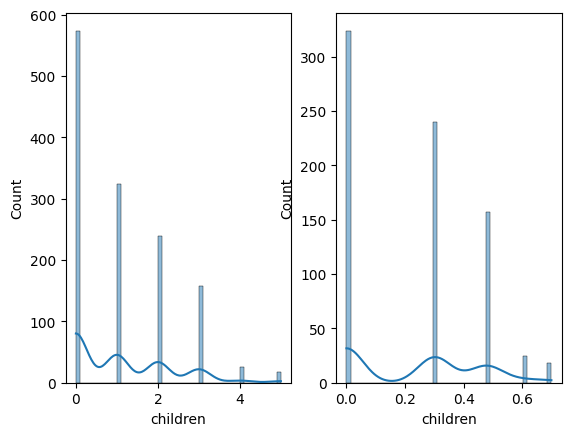

In [56]:
fig,(ax1,ax2)=plt.subplots(ncols=2)#tragrt variable
sns.histplot(df['children'],kde=True,bins=50,fill=True,ax=ax1)
# data is rightskewed
# we apply log transformation 
sns.histplot(np.log10(df['children']),kde=True,bins=50,fill=True,ax=ax2)

<Axes: xlabel='children'>

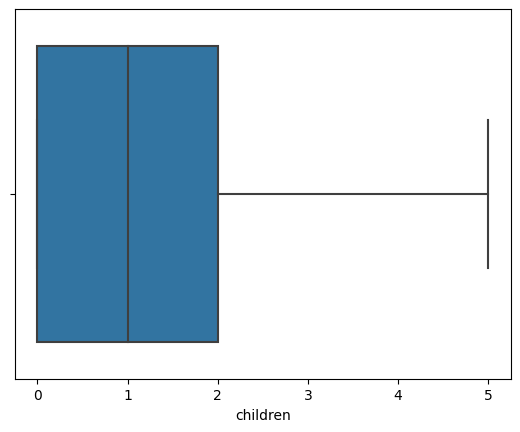

In [27]:
sns.boxplot(x="children",data=df)

<Axes: xlabel='charges'>

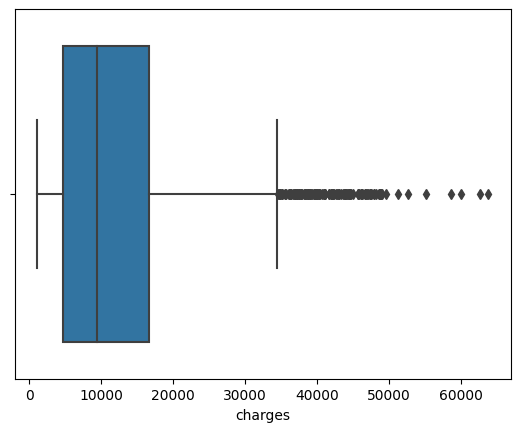

In [30]:
sns.boxplot(x='charges',data=df)

<Axes: >

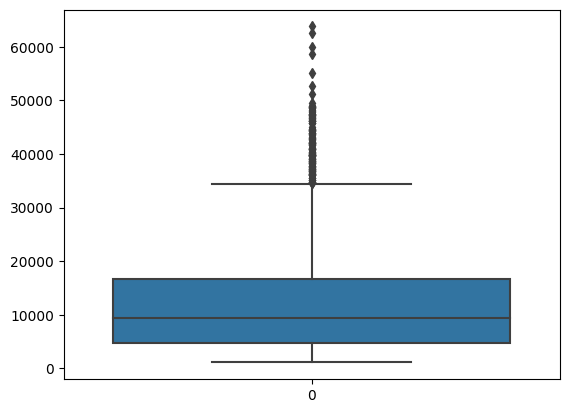

In [34]:
sns.boxplot(df['charges'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='charges', ylabel='Count'>

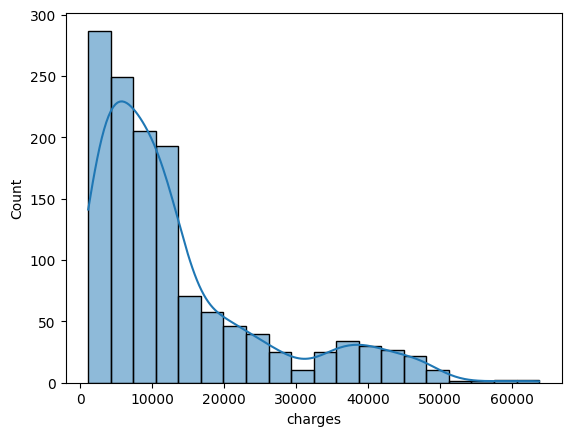

In [32]:
sns.histplot(x='charges',data=df,kde=True,bins=20)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='charges', ylabel='Count'>

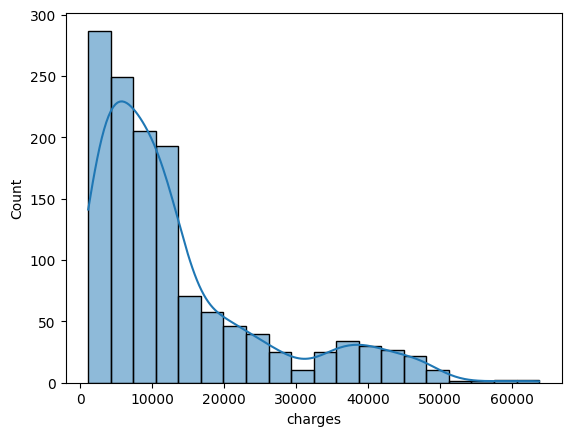

In [33]:
sns.histplot(df['charges'],kde=True,bins=20)

In [35]:
df['charges'].skew()

1.5158796580240388

**Bivariate**

countplot and parcentage pieplot

In [40]:
a=df.describe(include=object)
a.columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [41]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

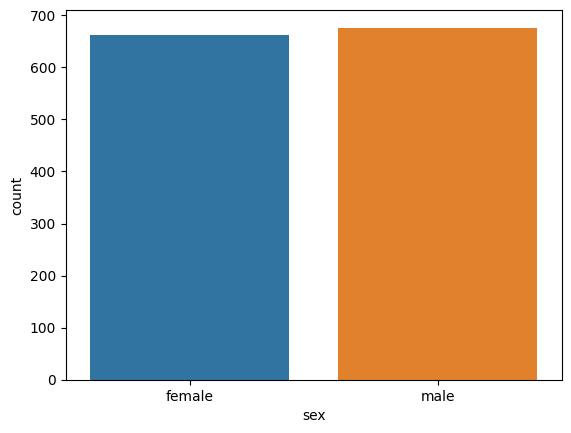

In [42]:
sns.countplot(x='sex',data=df)

In [44]:
parcentage=df['sex'].value_counts()/len(df)*100
parcentage

sex
male      50.523169
female    49.476831
Name: count, dtype: float64

<Axes: ylabel='count'>

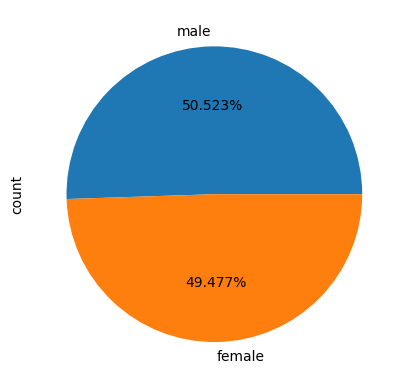

In [46]:
df['sex'].value_counts().plot(kind='pie',autopct='%.3f%%')
df['sex'].value_counts().plot(kind='pie',autopct='%.3f%%',explode(for i in range))


<Axes: xlabel='sex', ylabel='count'>

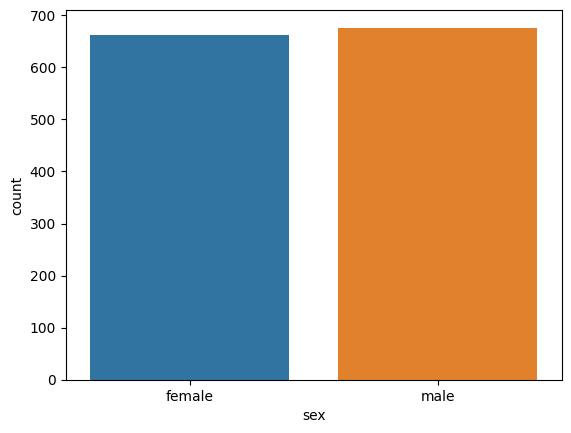

In [47]:
sns.countplot(x='smoker',data=df)

In [48]:
parcentage=df['smoker'].value_counts()/len(df)*100
parcentage

smoker
no     79.521674
yes    20.478326
Name: count, dtype: float64

<Axes: ylabel='count'>

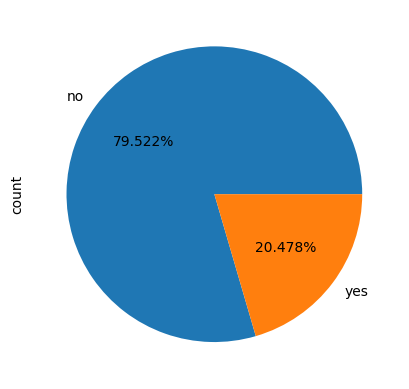

In [49]:
df['smoker'].value_counts().plot(kind='pie',autopct='%.3f%%')

<Axes: xlabel='region', ylabel='count'>

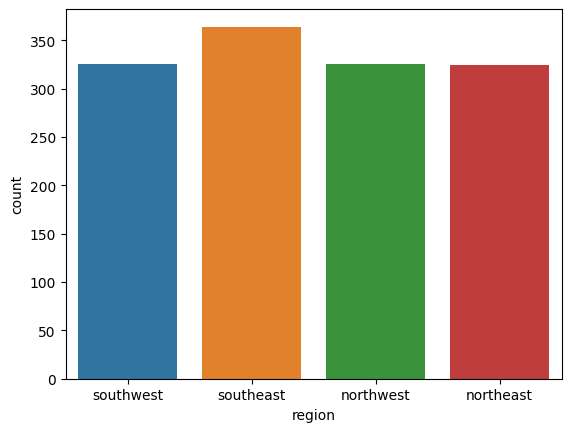

In [50]:
sns.countplot(x='region',data=df)

In [51]:
parcentage=df['region'].value_counts()/len(df)*100
parcentage

region
southeast    27.204783
southwest    24.289985
northwest    24.289985
northeast    24.215247
Name: count, dtype: float64

<Axes: ylabel='count'>

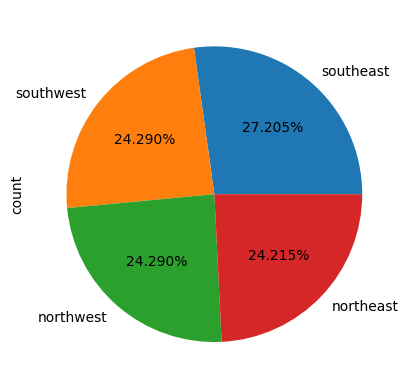

In [53]:
df['region'].value_counts().plot(kind='pie',autopct="%.3f%%")

num vs num:lmplot,
cat vs num:histplot,boxplot,ledeplot
cat vs cat:countplot , pie 

****Bivariate****